In [5]:
import numpy as np
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import os
from experiment_utils import experiment, interactive_alignment_plot_py3dmol
# %matplotlib widget

In [6]:
molecule_sizes = [6, 8, 3]

In [8]:
data_path = "../Data/S1-MA-W1/"
mol_pair_list_path = os.path.join(data_path, 'list')
molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='water cluster')
#mol_set = set()
#for nameA, nameB in molecule_pairs:
#    mol_set.add(nameA)
#    mol_set.add(nameB)
#for name in mol_set:
#    mol = next(pybel.readfile('xyz', os.path.join(data_path, name + '.xyz')))
#    X, _, _ = otm.tl.process_molecule(mol) 
#    _, T_sy2 = otm.tl.parse_sy2(os.path.join(data_path, name + '_chimera.sy2'))
#    T_mna = otm.tl.parse_mna(os.path.join(data_path, name + '.mna'))
#    otm.tl.write_xyz_with_custom_labels('../Data/S1-MA-W1/{}_sy2.xyz'.format(name), X, T_sy2)
#    otm.tl.write_xyz_with_custom_labels('../Data/S1-MA-W1/{}_mna.xyz'.format(name), X, T_mna)

In [9]:
otmol_name_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='element name', 
    alpha_list=np.linspace(0,1,101), 
    molecule_sizes = molecule_sizes, 
    dataset_name = 'S1MAW1',
    save = True
    )
otmol_type_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom type', 
    alpha_list=np.linspace(0,1,101), 
    molecule_sizes = molecule_sizes, 
    dataset_name = 'S1MAW1',
    save = True
    )
otmol_conn_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom connectivity', 
    alpha_list=np.linspace(0,1,101), 
    molecule_sizes = molecule_sizes, 
    dataset_name = 'S1MAW1', 
    save = True
    )

s1maw1-1 s1maw1-2 0.67
s1maw1-1 s1maw1-3 0.58
s1maw1-1 s1maw1-4 0.12
s1maw1-1 s1maw1-5 0.55
s1maw1-1 s1maw1-6 0.79
s1maw1-1 s1maw1-7 0.56
s1maw1-1 s1maw1-8 0.72
s1maw1-1 s1maw1-9 0.80
s1maw1-1 s1maw1-10 0.42
s1maw1-1 s1maw1-11 0.56
s1maw1-1 s1maw1-12 0.55
s1maw1-1 s1maw1-13 0.76
s1maw1-1 s1maw1-14 0.55
s1maw1-1 s1maw1-15 0.49
s1maw1-1 s1maw1-16 0.41
s1maw1-1 s1maw1-17 0.97
s1maw1-1 s1maw1-18 0.92
s1maw1-1 s1maw1-19 0.98
s1maw1-1 s1maw1-20 0.77
s1maw1-1 s1maw1-2 1.08
s1maw1-1 s1maw1-3 0.58
s1maw1-1 s1maw1-4 0.12
s1maw1-1 s1maw1-5 0.55
s1maw1-1 s1maw1-6 0.79
s1maw1-1 s1maw1-7 1.03
s1maw1-1 s1maw1-8 0.72
s1maw1-1 s1maw1-9 0.80
s1maw1-1 s1maw1-10 0.42
s1maw1-1 s1maw1-11 0.56
s1maw1-1 s1maw1-12 0.55
s1maw1-1 s1maw1-13 0.76
s1maw1-1 s1maw1-14 0.55
s1maw1-1 s1maw1-15 0.49
s1maw1-1 s1maw1-16 0.41
s1maw1-1 s1maw1-17 1.14
s1maw1-1 s1maw1-18 1.17
s1maw1-1 s1maw1-19 1.14
s1maw1-1 s1maw1-20 0.96
s1maw1-1 s1maw1-2 1.08
s1maw1-1 s1maw1-3 0.58
s1maw1-1 s1maw1-4 0.12
s1maw1-1 s1maw1-5 0.55
s1maw1-1 s1m

In [8]:
# %%
# Read the molecules
molA = next(pybel.readfile("xyz", os.path.join(data_path, "s1maw1-1.xyz")))
molB = next(pybel.readfile("xyz", os.path.join(data_path, "s1maw1-20.xyz")))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_conn_res['assignment'][18]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, 's1maw1-1', 's1maw1-20', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

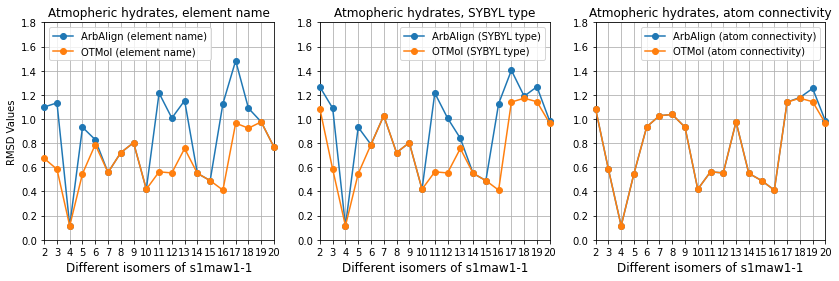

In [10]:
arbalign_res = pd.read_csv('./arbalign_output/S1MAW1_result.csv')

combined_df = pd.concat([
    arbalign_res.rename(columns={
        'RMSD(ArbAlign+element name)': 'ArbAlign (element name)', 
        'RMSD(ArbAlign+atom type)': 'ArbAlign (SYBYL type)',
        'RMSD(ArbAlign+atom connectivity)': 'ArbAlign (atom connectivity)'
        }), 
    otmol_name_res.rename(columns={'RMSD(OTMol+element name)': 'OTMol (element name)'}), 
    otmol_type_res.rename(columns={'RMSD(OTMol+atom type)': 'OTMol (SYBYL type)'}), 
    otmol_conn_res.rename(columns={'RMSD(OTMol+atom connectivity)': 'OTMol (atom connectivity)'}
    ), 
    ], axis=1)

plt.figure(figsize=(14,4))
plt.subplot(131)
columns_to_plot = ["ArbAlign (element name)", "OTMol (element name)"]
for column in columns_to_plot:
    plt.plot(range(2,21), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("Atmopheric hydrates, element name")
plt.xlabel("Different isomers of s1maw1-1", fontsize=12)
plt.ylabel("RMSD Values")
plt.ylim(0, 1.8)
plt.xticks(range(2,21))
plt.xlim(2,20)
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(132)
columns_to_plot = ["ArbAlign (SYBYL type)", "OTMol (SYBYL type)"]
for column in columns_to_plot:
    plt.plot(range(2,21), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("Atmopheric hydrates, SYBYL type")
plt.xlabel("Different isomers of s1maw1-1", fontsize=12)
plt.ylim(0, 1.8)
plt.xticks(range(2,21))
plt.xlim(2,20)
plt.legend()
plt.grid(True)

plt.subplot(133)
columns_to_plot = ["ArbAlign (atom connectivity)", "OTMol (atom connectivity)"]
for column in columns_to_plot:
    plt.plot(range(2,21), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("Atmopheric hydrates, atom connectivity")
plt.xlabel("Different isomers of s1maw1-1", fontsize=12)
plt.ylim(0, 1.8)
plt.xticks(range(2,21))
plt.xlim(2,20)
plt.legend()
plt.grid(True)
plt.savefig("../images/S1MAW1.png", dpi=300, bbox_inches='tight')

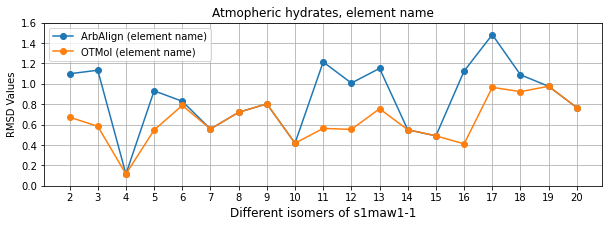

In [7]:
arbalign_res = pd.read_csv(os.path.join(data_path, 'rmsd-2017.dat'), sep='\s+')
combined_df = pd.concat([
    arbalign_res.rename(columns={
        'RMSD(KM-ByAtomName)': 'ArbAlign (element name)', 
        'RMSD(KM-ByAtomType)': 'ArbAlign (SYBYL type)', 
        'RMSD(KM-byAtomConn)': 'ArbAlign (atom connectivity)'
        }),  
    otmol_name_res.rename(columns={'RMSD(OTMol+element name)': 'OTMol (element name)'}), 
    otmol_type_res.rename(columns={'RMSD(OTMol+atom type)': 'OTMol (SYBYL type)'}), 
    otmol_conn_res.rename(columns={'RMSD(OTMol+atom connectivity)': 'OTMol (atom connectivity)'})
    ], axis=1)
columns_to_plot = ["ArbAlign (element name)", "OTMol (element name)"]
plt.figure(figsize=(10,3))
for column in columns_to_plot:
    plt.plot(range(2,21), combined_df[column], marker='o', label=column)
plt.title("Atmopheric hydrates, element name")
plt.xlabel("Different isomers of s1maw1-1", fontsize=12)
plt.ylabel("RMSD Values")
plt.ylim(0, 1.6)
plt.xticks(range(2,21))
plt.legend()
plt.grid(True)
plt.savefig("../images/S1_element_name.png", dpi=300, bbox_inches='tight')

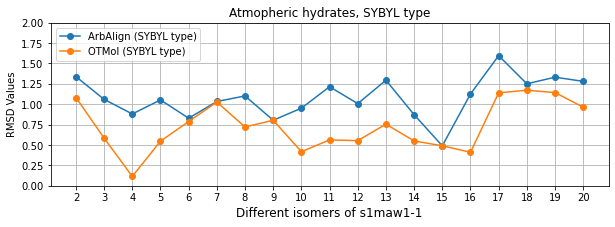

In [8]:
columns_to_plot = ["ArbAlign (SYBYL type)", "OTMol (SYBYL type)"]
plt.figure(figsize=(10,3))
for column in columns_to_plot:
    plt.plot(range(2,21), combined_df[column], marker='o', label=column)
plt.title("Atmopheric hydrates, SYBYL type")
plt.xlabel("Different isomers of s1maw1-1", fontsize=12)
plt.ylabel("RMSD Values")
plt.ylim(0, 2)
plt.xticks(range(2,21))
plt.legend()
plt.grid(True)
plt.savefig("../images/S1_SYBYL_type.png", dpi=300, bbox_inches='tight')

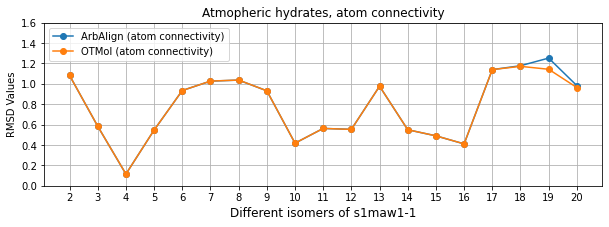

In [9]:
columns_to_plot = ["ArbAlign (atom connectivity)", "OTMol (atom connectivity)"]
plt.figure(figsize=(10,3))
for column in columns_to_plot:
    plt.plot(range(2,21), combined_df[column], marker='o', label=column)
plt.title("Atmopheric hydrates, atom connectivity")
plt.xlabel("Different isomers of s1maw1-1", fontsize=12)
plt.ylabel("RMSD Values")
plt.ylim(0, 1.6)
plt.xticks(range(2,21))
plt.legend()
plt.grid(True)
plt.savefig("../images/S1_atom_connectivity.png", dpi=300, bbox_inches='tight')

GW

In [2]:
molecule_sizes = [6, 8, 3]
data_path = "../Data/S1-MA-W1/"
mol_pair_list_path = os.path.join(data_path, 'list')
molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='water cluster')
GW_name_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='element name', 
    alpha_list=np.linspace(0,1,101), 
    molecule_sizes = molecule_sizes, 
    dataset_name = 'S1MAW1',
    save = True,
    plain_GW = True
    )
GW_type_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom type', 
    alpha_list=np.linspace(0,1,101), 
    molecule_sizes = molecule_sizes, 
    dataset_name = 'S1MAW1',
    save = True,
    plain_GW = True
    )
GW_conn_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom connectivity', 
    alpha_list=np.linspace(0,1,101), 
    molecule_sizes = molecule_sizes, 
    dataset_name = 'S1MAW1', 
    save = True,
    plain_GW = True
    )

s1maw1-1 s1maw1-2 1.09
s1maw1-1 s1maw1-3 1.11
s1maw1-1 s1maw1-4 0.12
s1maw1-1 s1maw1-5 1.09
s1maw1-1 s1maw1-6 1.23
s1maw1-1 s1maw1-7 1.03
s1maw1-1 s1maw1-8 1.10
s1maw1-1 s1maw1-9 1.25
s1maw1-1 s1maw1-10 0.42
s1maw1-1 s1maw1-11 1.01
s1maw1-1 s1maw1-12 1.01
s1maw1-1 s1maw1-13 1.21
s1maw1-1 s1maw1-14 1.00
s1maw1-1 s1maw1-15 1.00
s1maw1-1 s1maw1-16 0.92
s1maw1-1 s1maw1-17 1.70
s1maw1-1 s1maw1-18 1.24
s1maw1-1 s1maw1-19 1.71
s1maw1-1 s1maw1-20 1.25
s1maw1-1 s1maw1-2 1.38
s1maw1-1 s1maw1-3 1.03
s1maw1-1 s1maw1-4 0.12
s1maw1-1 s1maw1-5 0.55
s1maw1-1 s1maw1-6 1.16
s1maw1-1 s1maw1-7 1.33
s1maw1-1 s1maw1-8 0.72
s1maw1-1 s1maw1-9 1.17
s1maw1-1 s1maw1-10 0.42
s1maw1-1 s1maw1-11 0.99
s1maw1-1 s1maw1-12 0.99
s1maw1-1 s1maw1-13 1.13
s1maw1-1 s1maw1-14 0.98
s1maw1-1 s1maw1-15 0.49
s1maw1-1 s1maw1-16 0.41
s1maw1-1 s1maw1-17 1.80
s1maw1-1 s1maw1-18 1.49
s1maw1-1 s1maw1-19 1.82
s1maw1-1 s1maw1-20 1.17
s1maw1-1 s1maw1-2 1.50
s1maw1-1 s1maw1-3 1.03
s1maw1-1 s1maw1-4 0.60
s1maw1-1 s1maw1-5 0.55
s1maw1-1 s1m

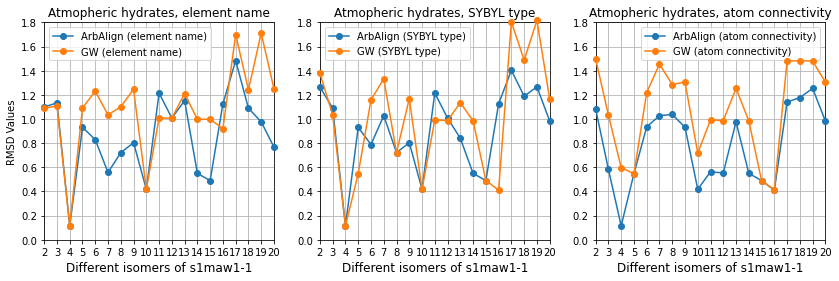

In [4]:
arbalign_res = pd.read_csv('./arbalign_output/S1MAW1_result.csv')

combined_df = pd.concat([
    arbalign_res.rename(columns={
        'RMSD(ArbAlign+element name)': 'ArbAlign (element name)', 
        'RMSD(ArbAlign+atom type)': 'ArbAlign (SYBYL type)',
        'RMSD(ArbAlign+atom connectivity)': 'ArbAlign (atom connectivity)'
        }), 
    GW_name_res.rename(columns={'RMSD(GW+element name)': 'GW (element name)'}), 
    GW_type_res.rename(columns={'RMSD(GW+atom type)': 'GW (SYBYL type)'}), 
    GW_conn_res.rename(columns={'RMSD(GW+atom connectivity)': 'GW (atom connectivity)'}
    ), 
    ], axis=1)

plt.figure(figsize=(14,4))
plt.subplot(131)
columns_to_plot = ["ArbAlign (element name)", "GW (element name)"]
for column in columns_to_plot:
    plt.plot(range(2,21), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("Atmopheric hydrates, element name")
plt.xlabel("Different isomers of s1maw1-1", fontsize=12)
plt.ylabel("RMSD Values")
plt.ylim(0, 1.8)
plt.xticks(range(2,21))
plt.xlim(2,20)
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(132)
columns_to_plot = ["ArbAlign (SYBYL type)", "GW (SYBYL type)"]
for column in columns_to_plot:
    plt.plot(range(2,21), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("Atmopheric hydrates, SYBYL type")
plt.xlabel("Different isomers of s1maw1-1", fontsize=12)
plt.ylim(0, 1.8)
plt.xticks(range(2,21))
plt.xlim(2,20)
plt.legend()
plt.grid(True)

plt.subplot(133)
columns_to_plot = ["ArbAlign (atom connectivity)", "GW (atom connectivity)"]
for column in columns_to_plot:
    plt.plot(range(2,21), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("Atmopheric hydrates, atom connectivity")
plt.xlabel("Different isomers of s1maw1-1", fontsize=12)
plt.ylim(0, 1.8)
plt.xticks(range(2,21))
plt.xlim(2,20)
plt.legend()
plt.grid(True)
#plt.savefig("../images/S1MAW1.png", dpi=300, bbox_inches='tight')